<a href="https://colab.research.google.com/github/MonicadeAraujo/DataWiseForecast/blob/main/DataWiseForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entrega: Statistics for Data Science & Machine Learning - Fernando Nemec** <br><br>
**Grupo:**<br><br>
RM557806 – Antônio Carlos Cardoso – Representante <br>
RM551066 – Mônica de Araújo <br>
RM557268 – Pedro Lopes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/DataWise-Dados.csv')

df['_data'] = df['Data'].apply(pd.to_datetime)
df['Ano'] = df['_data'].dt.year
df['Mês'] = df['_data'].dt.month
df['Dia'] = df['_data'].dt.date

# Converte a coluna 'Hora (UTC)' para numérico, com tratamento de erros
df['Hora (UTC)'] = pd.to_numeric(df['Hora (UTC)'], errors='coerce')

# Converte a coluna 'Vel. Vento (m/s)' para numérico, com tratamento de erros
df['Vel. Vento (m/s)'] = pd.to_numeric(df['Vel. Vento (m/s)'], errors='coerce')

# Converte a coluna 'Temp. Ins. (C)' para numérico após substituir ',' por '.' no formato de string
df['Temp. Ins. (C)'] = pd.to_numeric(df['Temp. Ins. (C)'].astype(str).str.replace(',', '.'), errors='coerce')

# Converte a coluna 'Temp. Max. (C)' para numérico após substituir ',' por '.' no formato de string
df['Temp. Max. (C)'] = pd.to_numeric(df['Temp. Max. (C)'].astype(str).str.replace(',', '.'), errors='coerce')

# Converte a coluna 'Temp. Min. (C)' para numérico após substituir ',' por '.' no formato de string
df['Temp. Min. (C)'] = pd.to_numeric(df['Temp. Min. (C)'].astype(str).str.replace(',', '.'), errors='coerce')

# Converte a coluna 'Umi. Ins. (%)' para numérico após substituir ',' por '.' no formato de string
df['Umi. Ins. (%)'] = pd.to_numeric(df['Umi. Ins. (%)'].astype(str).str.replace(',', '.'), errors='coerce')


<ipython-input-211-a452dd597a3d>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['_data'] = df['Data'].apply(pd.to_datetime)


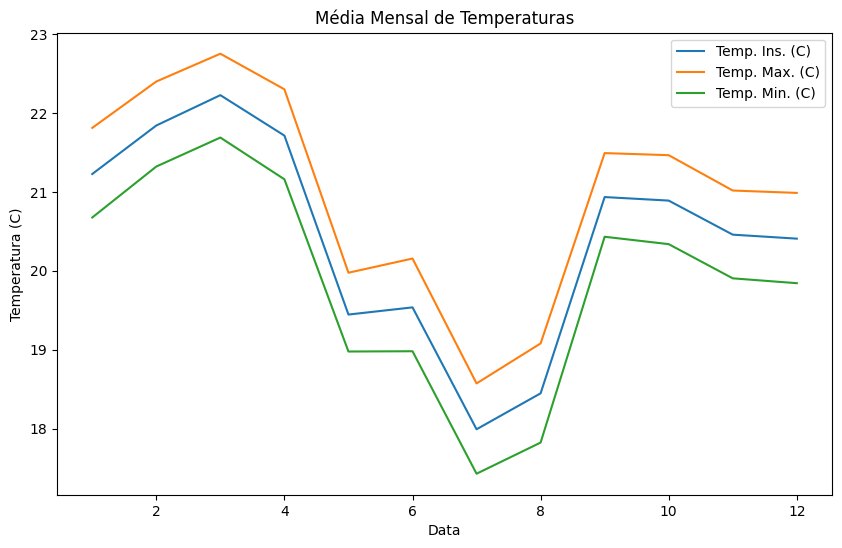

In [ ]:
#Calcula a media mês a mês das colunas Temp. Ins., Temp. Max, Temp. Min.
media_mensal = df.groupby('Mês')[['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']].mean()

#Plota o gráfico de linha para a média mensal
media_mensal.plot(kind='line', figsize=(10, 6))
plt.title('Média Mensal de Temperaturas')
plt.xlabel('Data')
plt.ylabel('Temperatura (C)')
plt.show()


<Figure size 1000x600 with 0 Axes>

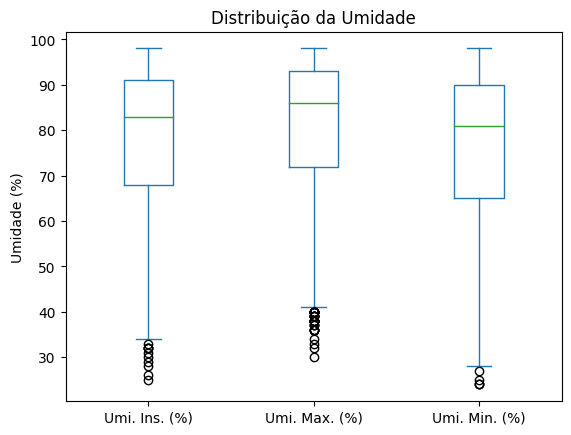

In [ ]:
#Define o tamanho do grafico
plt.figure(figsize=(10, 6))

#Cria um boxplot para as colunas de umidade
df[['Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)']].plot(kind='box')
plt.title('Distribuição da Umidade')
plt.ylabel('Umidade (%)')
plt.show()


<ipython-input-214-699b63eb647c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vel. Vento (m/s)'] = df['Vel. Vento (m/s)'].replace({',': '.'}, regex=True).astype(float)


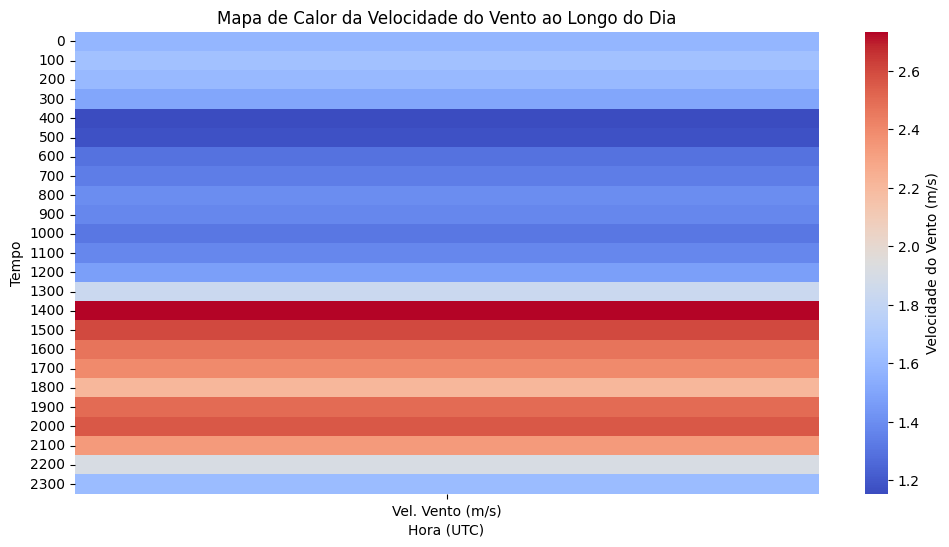

In [ ]:
# Remove as linhas do DataFrame que contêm valores faltantes nas colunas 'Hora (UTC)' e 'Vel. Vento (m/s)'
df = df.dropna(subset=['Hora (UTC)', 'Vel. Vento (m/s)'])

# Converte as colunas 'Hora (UTC)' e 'Vel. Vento (m/s)' para o tipo numérico
df['Vel. Vento (m/s)'] = df['Vel. Vento (m/s)'].replace({',': '.'}, regex=True).astype(float)

# Cria um mapa de calor para a velocidade do vento ao longo do dia
heatmap_data = df.pivot_table(index='Hora (UTC)', values='Vel. Vento (m/s)', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Velocidade do Vento (m/s)'})
plt.xlabel('Hora (UTC)')
plt.ylabel('Tempo')
plt.title('Mapa de Calor da Velocidade do Vento ao Longo do Dia')
plt.show()

<ipython-input-216-02bb32531065>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['_data'] = df['Data'].apply(pd.to_datetime)


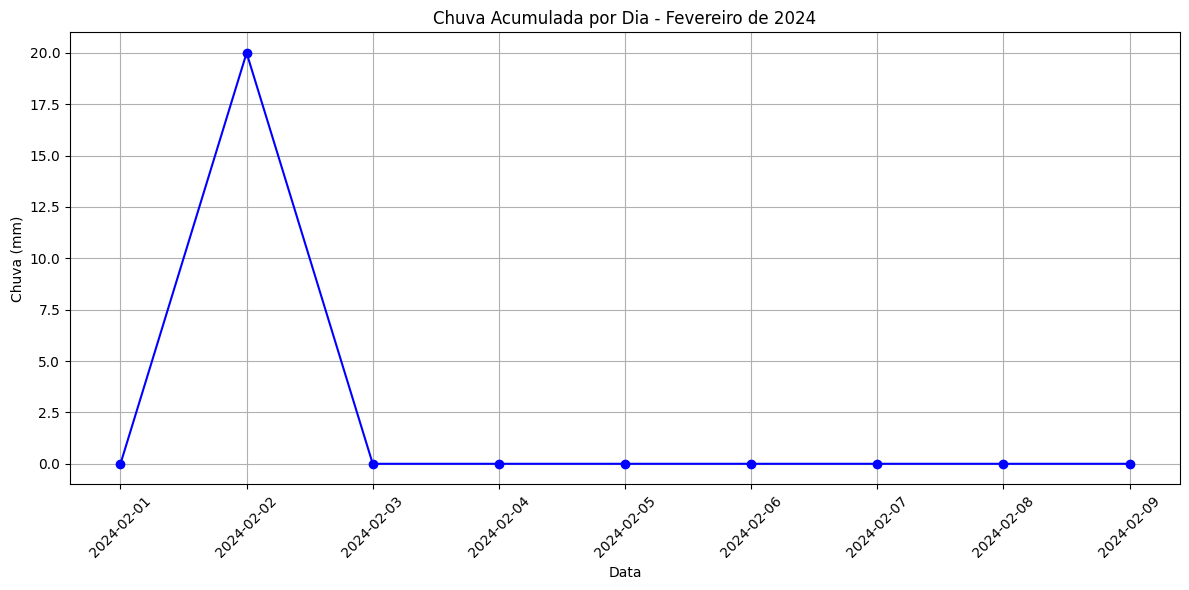

In [ ]:
#Extrai o arquivo CSV novamente para realziar outro tratamento de dados
df = pd.read_csv('/content/drive/MyDrive/DataWise-Dados.csv')

#Converte a data para o formato correto do pandas
df['_data'] = df['Data'].apply(pd.to_datetime)
df['Ano'] = df['_data'].dt.year
df['Mês'] = df['_data'].dt.month
df['Dia'] = df['_data'].dt.date

#Converte a coluna 'Chuva (mm)' para numérico, com tratamento de erros
df['Chuva (mm)'] = pd.to_numeric(df['Chuva (mm)'], errors='coerce')

#Converte a coluna 'Data' para o formato correto do pandas com correção de erros
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

#Remove as linhas do DataFrame que contêm valores faltantes nas colunas 'Data' e 'Chuva (mm)'
df = df.dropna(subset=['Data', 'Chuva (mm)'])

#Filtra DataFrame apenas ao mês 2 de 2024
df_fevereiro = df[(df['Mês'] == 2) & (df['Ano'] == 2024)]

# Agrupa os dados do DataFrame 'df_fevereiro' por data (apenas data, sem hora) e
#calcula a soma total da coluna 'Chuva (mm)' para cada dia, armazenando o resultado na variável 'chuva_diaria'
chuva_diaria = df_fevereiro.groupby(df_fevereiro['Data'].dt.date)['Chuva (mm)'].sum()

#Plota o gráfico de linha para a soma de Chuva Acumulada por dia
plt.figure(figsize=(12, 6))
chuva_diaria.plot(kind='line', marker='o', color='blue')
plt.title('Chuva Acumulada por Dia - Fevereiro de 2024')
plt.xlabel('Data')
plt.ylabel('Chuva (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

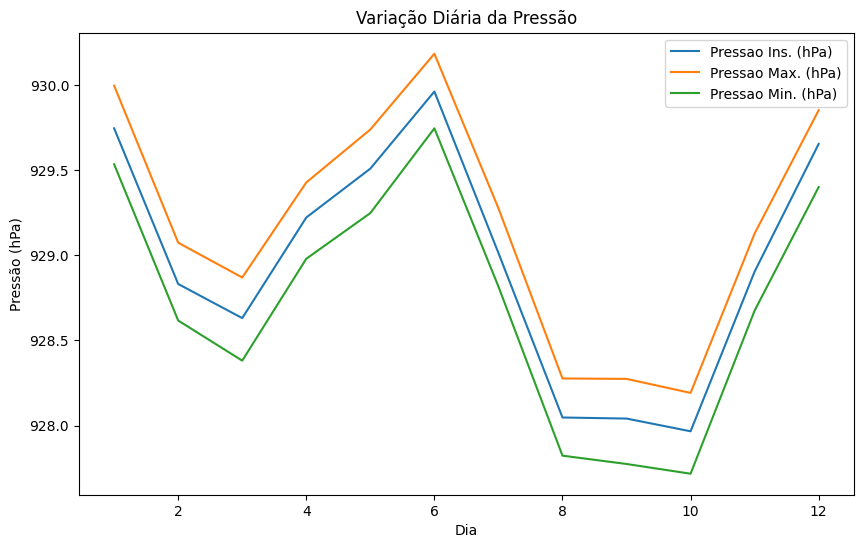

In [ ]:
# Converte as colunas de pressão atmosférica para numérico após substituir ',' por '.' no formato de string,
# garantindo que valores ausentes sejam convertidos para NaN.
df['Pressao Ins. (hPa)'] = pd.to_numeric(df['Pressao Ins. (hPa)'].str.replace(',', '.'), errors='coerce')
df['Pressao Max. (hPa)'] = pd.to_numeric(df['Pressao Max. (hPa)'].str.replace(',', '.'), errors='coerce')
df['Pressao Min. (hPa)'] = pd.to_numeric(df['Pressao Min. (hPa)'].str.replace(',', '.'), errors='coerce')

# Calcula a média mensal do valores de pressão.
media_pressao = df.groupby('Mês')[['Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)']].mean()

# Plota um gráfico de linha com os valores trabalhados de pressão
media_pressao.plot(kind='line', figsize=(10, 6))
plt.title('Variação Diária da Pressão')
plt.xlabel('Dia')
plt.ylabel('Pressão (hPa)')
plt.show()


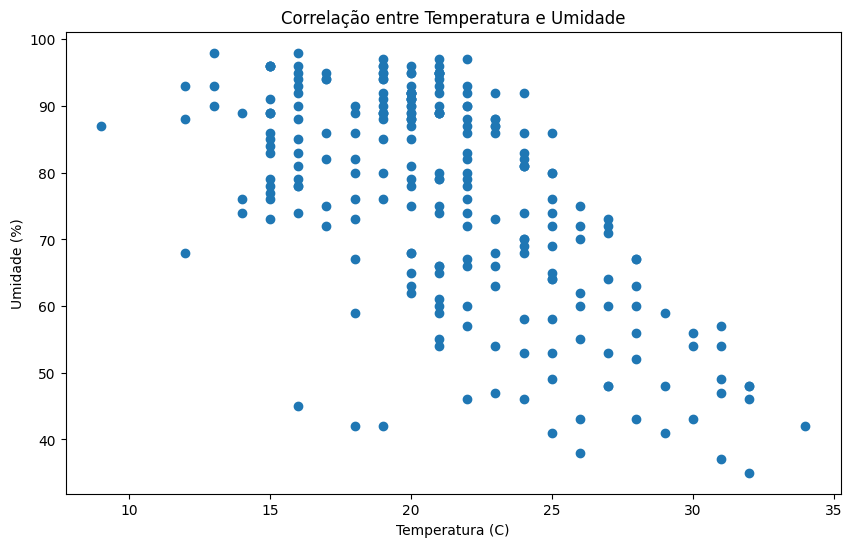

In [ ]:
# Converte as colunas de temperatura instantânea e umidade instantânea para valores numéricos,
# tratando erros e convertendo valores inválidos para NaN.

df['Temp. Ins. (C)'] = pd.to_numeric(df['Temp. Ins. (C)'], errors='coerce')
df['Umi. Ins. (%)'] = pd.to_numeric(df['Umi. Ins. (%)'], errors='coerce')

# Remove as linhas do DataFrame que contêm valores faltantes nas colunas 'Temp. Ins. (C)' e 'Umi. Ins. (%)'
df = df.dropna(subset=['Temp. Ins. (C)', 'Umi. Ins. (%)'])

# Cria um gráfico de dispersão para visualizar a correlação entre temperatura e umidade.
plt.figure(figsize=(10, 6))
plt.scatter(df['Temp. Ins. (C)'], df['Umi. Ins. (%)'])
plt.title('Correlação entre Temperatura e Umidade')
plt.xlabel('Temperatura (C)')
plt.ylabel('Umidade (%)')
plt.show()